# Mapping NYC subways

In [1]:
import geopandas as gp
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
subway_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
subway_df = gp.GeoDataFrame(subway_df, geometry=gp.points_from_xy(subway_df['GTFS Longitude'], subway_df['GTFS Latitude']))

boros = gp.read_file(gp.datasets.get_path("nybb"))
zip_bounds = gp.read_file("ZIP_CODE_040114.shp")

In [3]:
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


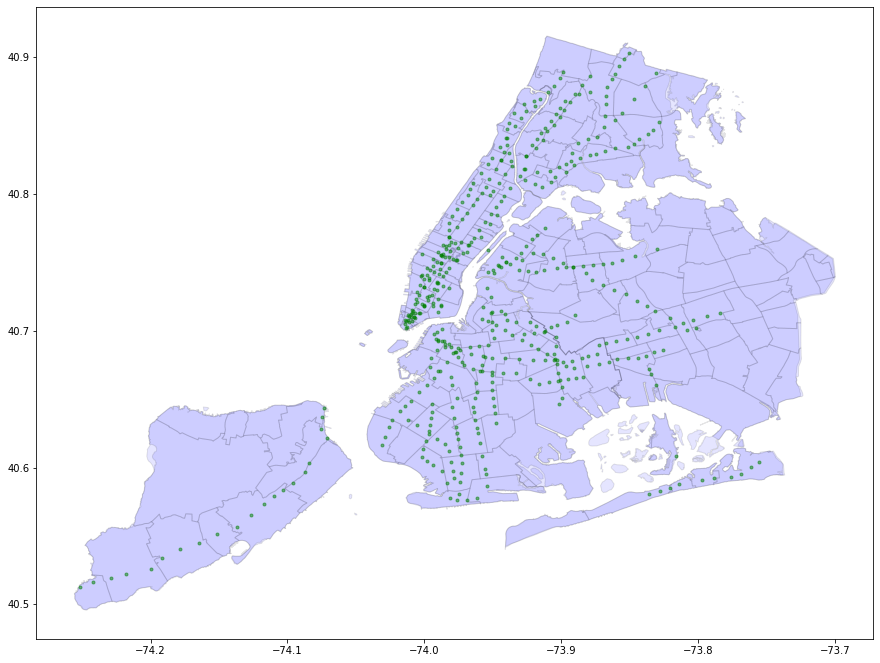

In [4]:

fig, ax = plt.subplots(figsize=(15,15))
ax = boros.to_crs("EPSG:4326").plot(ax=ax, color="blue", edgecolor="black", alpha=.1);
zip_bounds = zip_bounds.to_crs("EPSG:4326").plot(ax=ax, color="blue", edgecolor="black", alpha=.1);
subway_df.plot(ax=ax, marker='.', color='green', alpha=0.5);
#plt.xlim(-74.1, -73.72)
#plt.ylim(40.65, 40.95)

In [8]:
zip_bounds = gp.read_file("ZIP_CODE_040114.shp")
zip_bounds.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

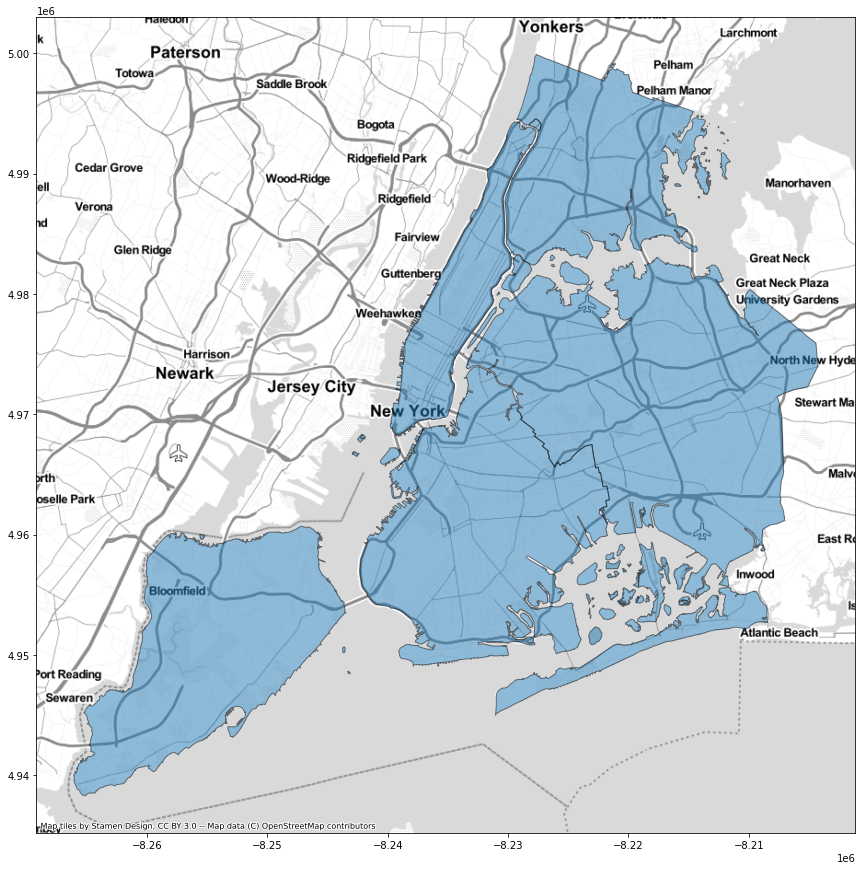

In [5]:

fig, ax = plt.subplots(figsize=(15,15))
#boros = boros.to_crs(epsg=3857)
ax = boros.to_crs("EPSG:3857").plot(ax=ax, figsize=(15, 15), alpha=0.5, edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
